<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


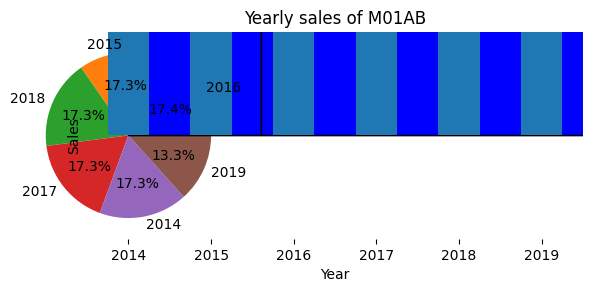

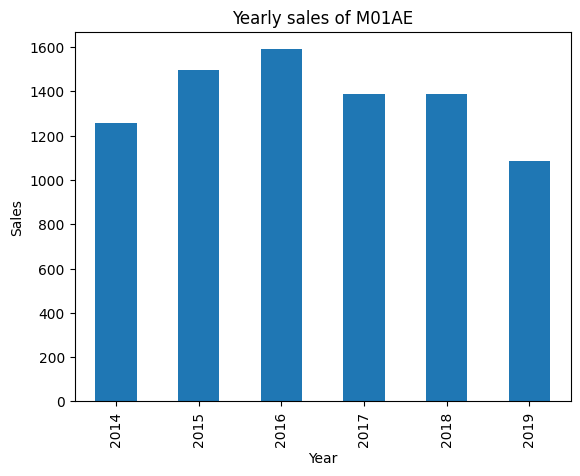

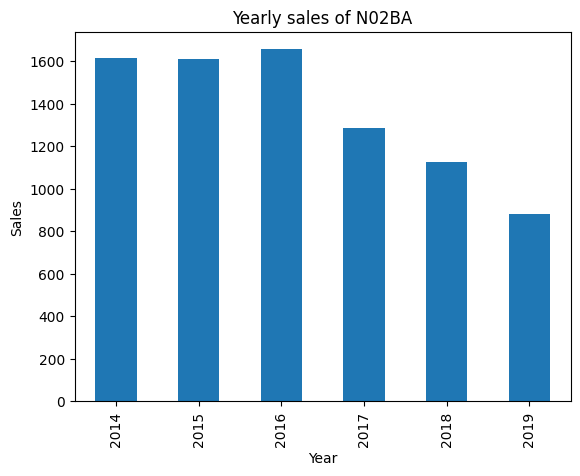

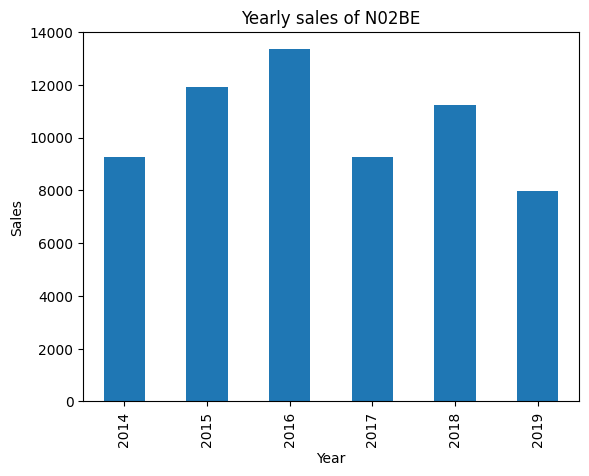

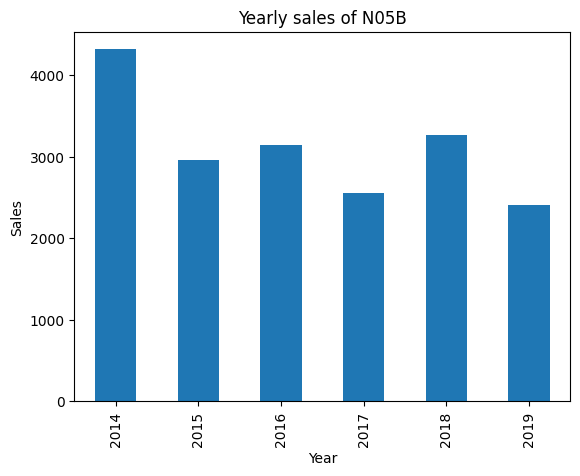

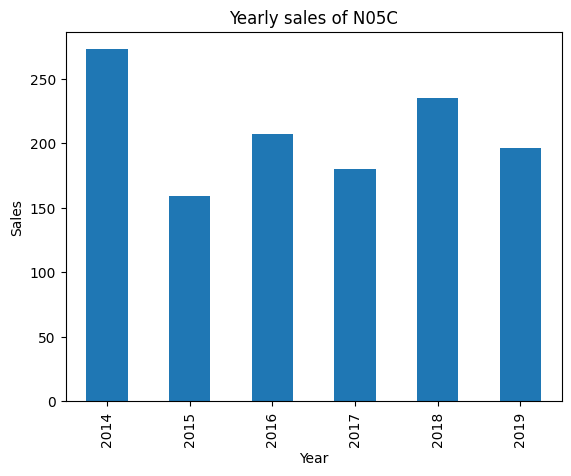

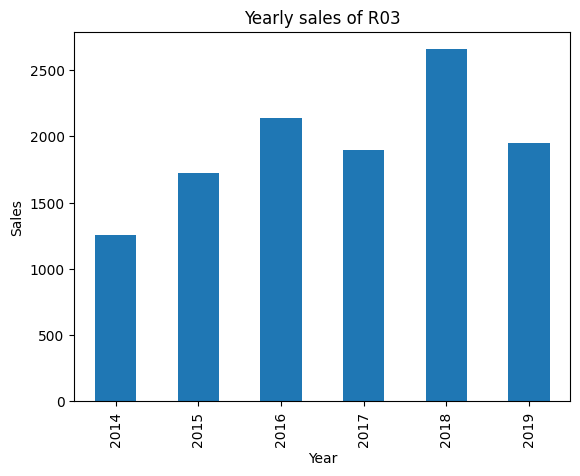

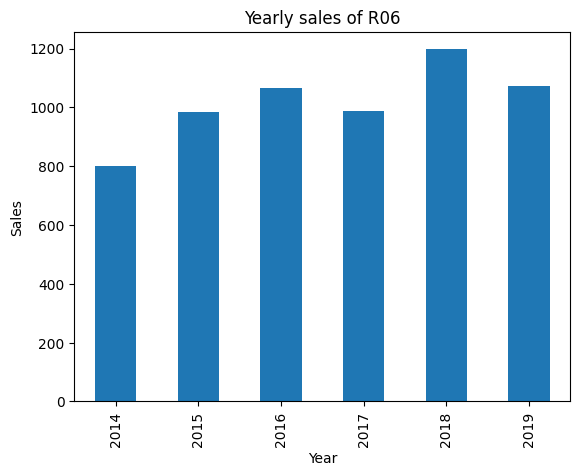

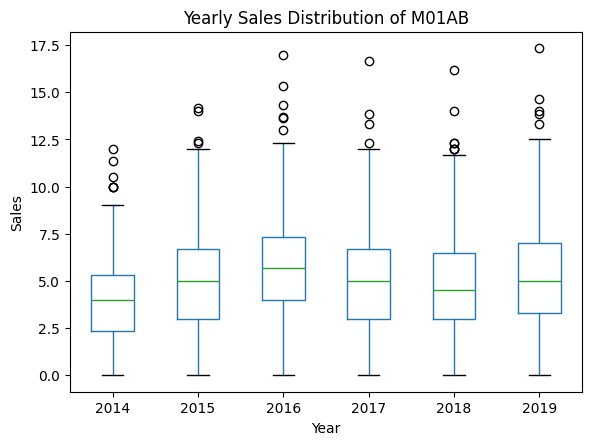

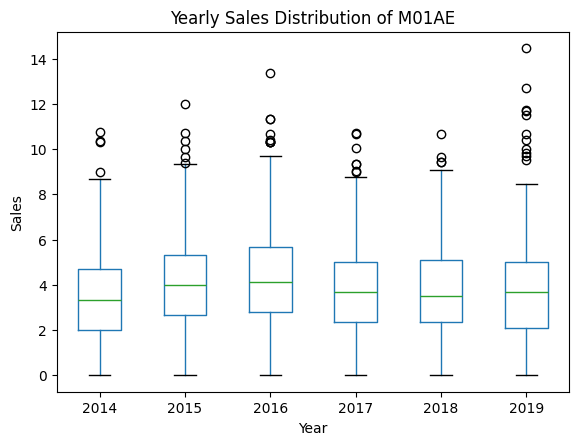

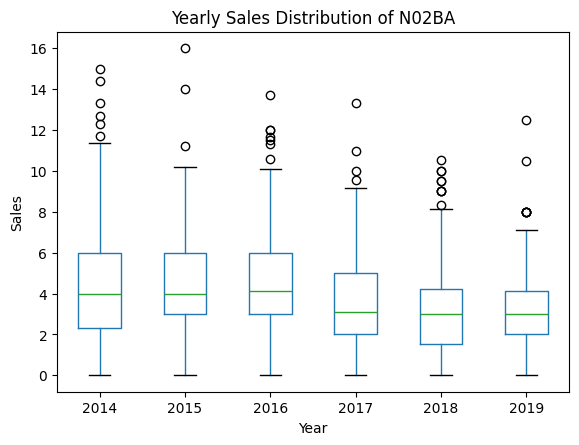

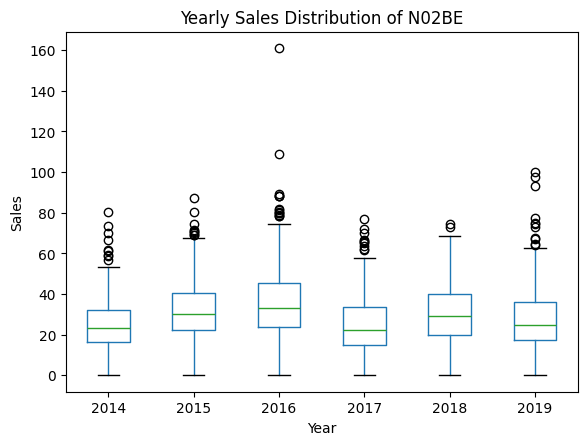

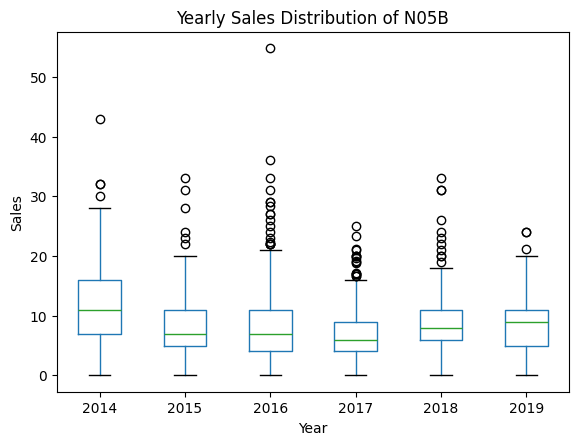

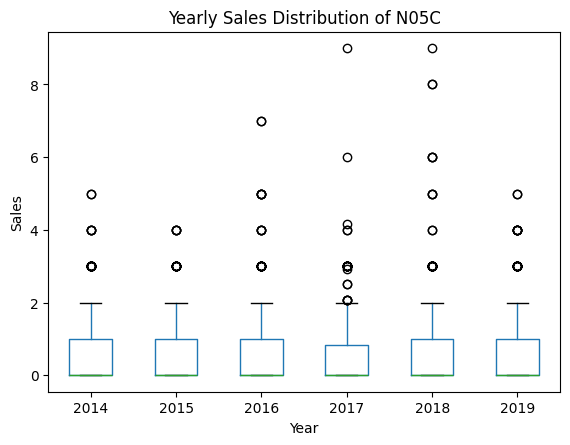

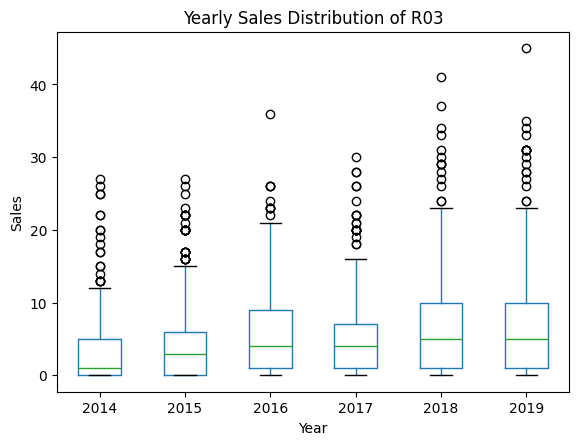

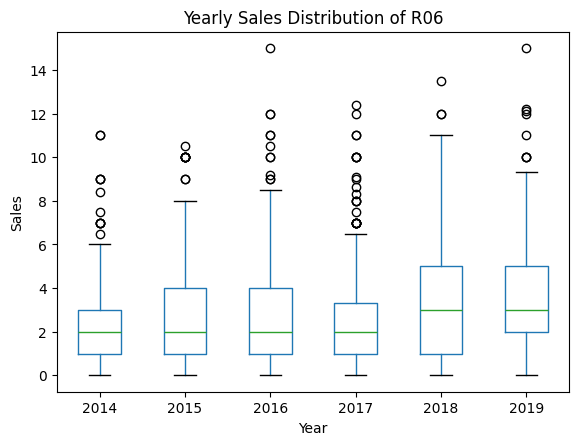

In [ ]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/dataset/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
#reading  data
sales_df = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\pharmainventory\dataset\input\salesdaily.csv')

sales_df.shape
sales_df.info()

sales_df.describe()

sales_df.head(10)

sales_df.tail(10)

sales_df.nunique()
# name of unique of years
sales_df['Year'].unique()
# name of unique of Hours
sales_df['Hour'].unique()
# Show samples of DATA 
sales_df[['M01AB','M01AE','Hour']].loc[100:110]
sales_df.iloc[0:7 , 0:7]
sales_df.loc[sales_df['R03']>10.0000]
sales_df[sales_df['M01AB']>4]

filtered_df = sales_df[((sales_df['M01AE'] > 3.000) | (sales_df['N02BA'] >4)) & (sales_df['Weekday Name'] == "Friday")]
filtered_df
# Sorting
sorted_df = sales_df.sort_values(['R06','R03','Year'])
sorted_df
sorted_df = sales_df.sort_values(['Month','Year'], ascending = [True,False])
sorted_df
# Grouping
#find min,max,mean-
grouped_df = sales_df.groupby('M01AB')
grouped_df.M01AB.agg(['mean','max','min'])
# find null values 
sales_df.isnull().sum()
#remove null
sales_df.dropna()
#replace null with 0
sales_df.fillna(value= 0)
sales_df
# Convert Date to Month and Year
sales_df['datum'] = pd.to_datetime(sales_df['datum'], format='%m/%d/%Y', errors='coerce')
# Extract month and year for grouping
sales_df['month'] = sales_df['datum'].dt.to_period('M')  # Converts to "YYYY-MM" format
sales_df['year'] = sales_df['datum'].dt.to_period('Y')
sales_df['day'] = sales_df['datum'].dt.to_period('D')
# Save Data to csv
sales_df.to_csv('sales_data.csv', index=True)
# Visulization
data_1 = sales_df["Year"].value_counts() ## convert object to numeric
# Create a pie chart
plt.pie(data_1.values, labels=data_1.index, autopct="%1.1f%%")
plt.title("Pie Chart of Years")
data_2=sales_df["M01AE"]
plt.hist(data_2, color="green", edgecolor="black")
plt.title("Histogram of M01AE")
plt.xlabel("Values")
plt.ylabel("Sales")
data_3=sales_df["N02BA"]
plt.hist(data_3, color="blue", edgecolor="black")
plt.title("Histogram of N02BA")
plt.xlabel("Values")
plt.ylabel("Sales")
def plot_yearly_sales(column):      #define a function to plot yearly sales of every category of drug.
    sales_df.groupby('year')[column].sum().plot.bar()   #calculating yearly sales using groupby
    plt.title(f'Yearly sales of {column}')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.show()

#plotting yearly sales of each drug category
for i in sales_df.columns[1:9]:#drug categories are from 1 to 8 index
    plot_yearly_sales(i) 

def plot_yearly_sales_boxplot(sales_df, column):  
    """
    Function to plot a boxplot of yearly sales for a given drug category.
    
    Parameters:
    sales_df (DataFrame): The DataFrame containing sales data.
    column (str): The column for which the boxplot should be plotted.
    """
    sales_df.boxplot(column=column, by='year', grid=False)  # Grouping by year and plotting a boxplot
    plt.title(f'Yearly Sales Distribution of {column}')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.suptitle('')  # Removes the default "by" title
    plt.show()

for i in sales_df.columns[1:9]:  # Assuming drug categories are in columns 1 to 8
    plot_yearly_sales_boxplot(sales_df, i)